<a href="https://colab.research.google.com/github/ppen/DemoAPI/blob/master/%5BDSE%5D_Classification_Survive_or_Not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download Titanic Dataset from: https://www.kaggle.com/c/titanic

In [ ]:
!gdown --id 12S4TrrgS9KyQbgLWMvYzChZvwOli855o

Downloading...
From: https://drive.google.com/uc?id=12S4TrrgS9KyQbgLWMvYzChZvwOli855o
To: /content/Titanic_dataset.zip
100% 23.8k/23.8k [00:00<00:00, 3.41MB/s]


Unzip Downloaded Dataset

In [ ]:
!unzip Titanic_dataset.zip

Archive:  Titanic_dataset.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: train.csv               
  inflating: description.txt         
  inflating: test.csv                


#Pipeline
1. Collect Dataset
2. Clean Data
3. Extract Features
4. Train
5. Evaluate
6. Create Pipeline

##1. Collect Dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
def load_data():
  train_df = pd.read_csv('train.csv')
  test_df = pd.read_csv('test.csv')
  return train_df, test_df

In [ ]:
train_df, test_df = load_data()

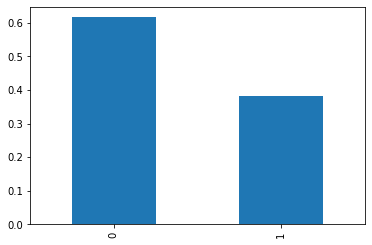

In [ ]:
train_df.Survived.value_counts(normalize=True).plot(kind='bar')

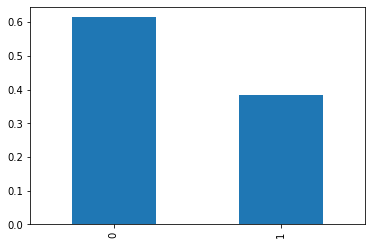

In [ ]:
test_df.Survived.value_counts(normalize=True).plot(kind='bar')

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
1,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0,0,0,A/5 3540,8.0500,NaN,S
2,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,NaN,S
3,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
4,844,0,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,NaN,C


##2. Clean Data

In [ ]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            146
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          545
Embarked         2
dtype: int64

In [ ]:
test_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             31
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          142
Embarked         0
dtype: int64

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
1,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0,0,0,A/5 3540,8.0500,NaN,S
2,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,NaN,S
3,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
4,844,0,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,NaN,C


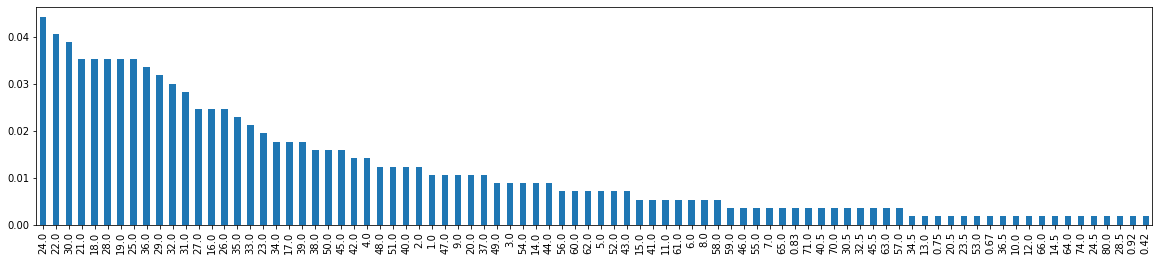

In [ ]:
train_df.Age.value_counts(normalize=True,sort=True).plot(kind='bar',figsize=(20,4))

In [ ]:
train_df.Age.mode()

0    24.0
dtype: float64

In [ ]:
train_df.Age.mean()

29.704805653710245

In [ ]:
train_df.Age.median()

28.0

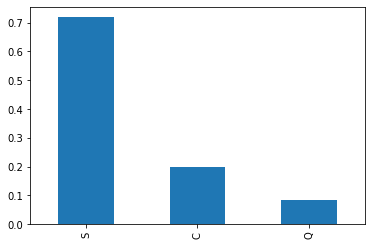

In [ ]:
train_df.Embarked.value_counts(normalize=True,sort=True).plot(kind='bar')

In [ ]:
train_df.Embarked.isna().sum()

2

In [ ]:
train_df['Embarked'].mode()

0    S
dtype: object

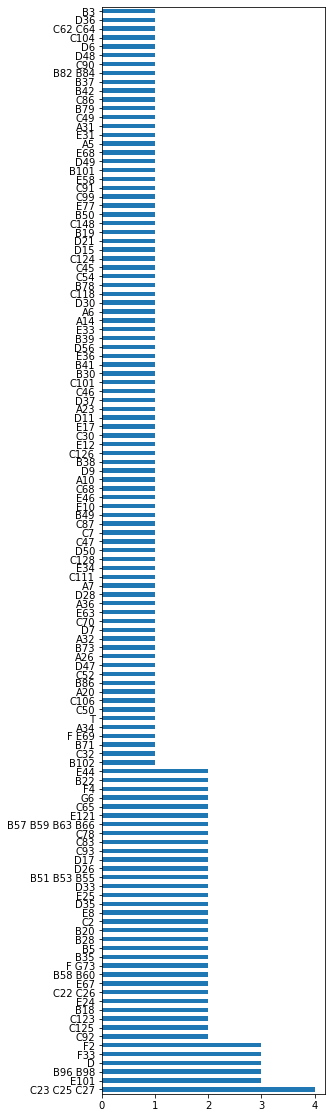

In [ ]:
train_df.Cabin.value_counts().plot(kind='barh',figsize=(4,20))

In [ ]:
len(train_df)

712

In [ ]:
train_df.Cabin.isna().sum()

545

In [ ]:
def clean_data(df):
  for col in df.columns:
    if col == 'Cabin':
      df[col] = df[col].fillna('No Cabin')
    else:
      mode = df[col].mode()[0]
      df[col] = df[col].fillna(mode)
  return df

In [ ]:
train_clean_df = clean_data(train_df)

In [ ]:
train_clean_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
test_clean_df = clean_data(test_df)

##3. Extract Feature

In [ ]:
def extract_feature(df):
  label = df['Survived']
  feat = df.drop(['PassengerId','Survived'], axis=1)
  feat = feat.drop('Sex', axis=1)
  feat = feat._get_numeric_data()
  return feat, label

In [ ]:
train_feat, train_label = extract_feature(train_clean_df)

In [ ]:
test_feat, test_label = extract_feature(test_clean_df)

In [ ]:
train_feat.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,32.0,0,0,56.4958
1,3,18.0,0,0,8.0500
2,3,5.0,4,2,31.3875
3,1,24.0,0,0,0.0000
4,3,34.5,0,0,6.4375


##4. Train model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [ ]:
def train_model(feat, label):
  model = GradientBoostingClassifier(random_state=2020)
  #model = SVC()
  model.fit(feat, label)
  return model

In [ ]:
model = train_model(train_feat, train_label)

In [ ]:
model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2020, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
feat_imp = pd.DataFrame()
feat_imp['feat_name'] = train_feat.columns
feat_imp['score'] = model.feature_importances_
feat_imp.sort_values(by='score', ascending=False)

,feat_name,score
4,Fare,0.362403
1,Age,0.276770
0,Pclass,0.229420
2,SibSp,0.103091
3,Parch,0.028317


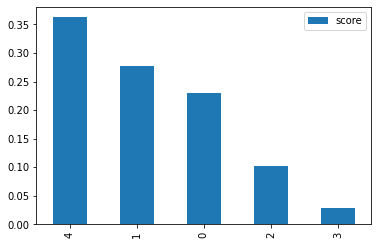

In [ ]:
feat_imp.sort_values(by='score', ascending=False).plot.bar()

## 5. Evaluation

In [ ]:
def eval_acc(prediction, actual):
  acc = sum(prediction == actual) / len(actual)
  return acc

In [ ]:
pred = model.predict(test_feat)
eval_acc(pred, test_label)

0.6703910614525139

In [ ]:
pred = model.predict(test_feat)
pred

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [ ]:
test_label

0      0
1      1
2      0
3      1
4      1
      ..
174    0
175    1
176    0
177    0
178    1
Name: Survived, Length: 179, dtype: int64

##6. Create pipeline

In [ ]:
def run_pipeline():
  # Get data
  train_df, test_df = load_data()

  # Clean & split data
  train_clean_df = clean_data(train_df)
  test_clean_df = clean_data(test_df)

  # Extract Feature
  train_feat, train_label = extract_feature(train_clean_df)
  test_feat, test_label = extract_feature(test_clean_df)
  
  # print(train_feat.columns)
  # Train model
  model = train_model(train_feat, train_label)

  # Evaluation
  pred = model.predict(test_feat)
  acc = eval_acc(pred, test_label)

  return acc

In [ ]:
print(run_pipeline())

0.6703910614525139


## Improve model performance

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,No Cabin,S
1,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0,0,0,A/5 3540,8.0500,No Cabin,S
2,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,No Cabin,S
3,634,0,1,"Parr, Mr. William Henry Marsh",male,24.0,0,0,112052,0.0000,No Cabin,S
4,844,0,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,No Cabin,C


In [ ]:
def extract_feature(df):
  feat = df.copy()
  label = feat['Survived']
  feat = feat.drop(['PassengerId','Survived'], axis=1)

  # get one-hot embedding feature
  dummie = pd.get_dummies(feat['Pclass'])
  feat = pd.concat([feat, dummie], axis=1)
  feat = feat.drop('Pclass', axis=1)

  feat = pd.concat([feat,pd.get_dummies(df[['Sex']])],axis=1)

  ## modify your code here


  feat = feat._get_numeric_data()
  return feat, label

In [ ]:
train_feat['Pclass']

0      3
1      3
2      3
3      1
4      3
      ..
707    2
708    3
709    1
710    1
711    3
Name: Pclass, Length: 712, dtype: int64

In [ ]:
pd.get_dummies(train_feat['Pclass'])

,1,2,3
0,0,0,1
1,0,0,1
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
707,0,1,0
708,0,0,1
709,1,0,0
710,1,0,0


In [ ]:
print(run_pipeline())

0.8324022346368715


## Get prefix feature

In [ ]:
def get_initial_feature(df):
  initial = []
  for i in range(len(df)):
    fn = df['Name'].values[i]
    initial.append(fn.split(',')[1].split('.')[0].strip())
  df['initial'] = initial
  initialdummy = pd.get_dummies(df['initial'])
  return initialdummy

In [ ]:
def load_data():
  train_df = pd.read_csv('train.csv') 
  test_df = pd.read_csv('test.csv')
  dat = pd.concat([train_df,test_df])
  idat = get_initial_feature(dat)
  dat = pd.concat([dat,idat],axis=1)
  train_df = dat.iloc[0:len(train_df)]
  test_df = dat.iloc[len(train_df):]
  return train_df, test_df

In [ ]:
x, _ = load_data() 

In [ ]:
x.initial.drop_duplicates()

0            Mr
2          Miss
7         Major
8        Master
12          Mrs
24          Rev
101          Dr
121    Jonkheer
148        Mlle
181         Mme
236          Ms
308        Capt
647         Sir
653         Col
Name: initial, dtype: object

In [ ]:
print(run_pipeline())

0.8268156424581006
